In [1]:
# import all packages required for the analysis
import pandas as pd
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [3]:
# install wordcloud package
!pip install wordcloud

In [5]:
%pwd

'/Users/JJJJ/Desktop/!!!NEU-MSIS/!学习/2021Fall/DAMG6105 - Ram/Final Project'

# 1. Hulu

In [6]:
# read Hulu dataset
# NOTE TO GRADER: file location might need to be tweaked based on where the csv files are located on your computer 
hulu_df = pd.read_csv("Hulu_top100movies.csv")

'''Then take a look at its rows and columns,

Shape is a fancy way of saying it'''
hulu_df.shape


(100, 14)

In [8]:
# overview of Hulu dataset
hulu_df['overview']

0     The Templeton brothers — Tim and his Boss Baby...
1     Searching for a safer habitat, the prehistoric...
2     A former Marine races against time to save a g...
3     Jim Hanson’s quiet life is suddenly disturbed ...
4     Lucky Prescott's life is changed forever when ...
                            ...                        
95    Philosophical twenty-something Ross Ulbricht c...
96    It's been ten years since the dragons moved to...
97    A journey into uncharted and forbidden territo...
98    A mother helps her daughter work through four ...
99    The charismatic Sir Lionel Frost considers him...
Name: overview, Length: 100, dtype: object

In [9]:
# convert the overview column to list
hulu_list = hulu_df['overview'].to_list()
hulu_list

['The Templeton brothers — Tim and his Boss Baby little bro Ted — have become adults and drifted away from each other. But a new boss baby with a cutting-edge approach and a can-do attitude is about to bring them together again … and inspire a new family business.',
 "Searching for a safer habitat, the prehistoric Crood family discovers an idyllic, walled-in paradise that meets all of its needs. Unfortunately, they must also learn to live with the Bettermans -- a family that's a couple of steps above the Croods on the evolutionary ladder. As tensions between the new neighbors start to rise, a new threat soon propels both clans on an epic adventure that forces them to embrace their differences, draw strength from one another, and survive together.",
 "A former Marine races against time to save a group of hostages -- including his young daughter and a congressman — when armed militants take over his stepfather's store.",
 'Jim Hanson’s quiet life is suddenly disturbed by two people cross

In [11]:
# split each word into a list
hulu_split_list = []
for overview in hulu_list:
    hulu_split_list.append(overview.split())
hulu_split_list

[['The',
  'Templeton',
  'brothers',
  '—',
  'Tim',
  'and',
  'his',
  'Boss',
  'Baby',
  'little',
  'bro',
  'Ted',
  '—',
  'have',
  'become',
  'adults',
  'and',
  'drifted',
  'away',
  'from',
  'each',
  'other.',
  'But',
  'a',
  'new',
  'boss',
  'baby',
  'with',
  'a',
  'cutting-edge',
  'approach',
  'and',
  'a',
  'can-do',
  'attitude',
  'is',
  'about',
  'to',
  'bring',
  'them',
  'together',
  'again',
  '…',
  'and',
  'inspire',
  'a',
  'new',
  'family',
  'business.'],
 ['Searching',
  'for',
  'a',
  'safer',
  'habitat,',
  'the',
  'prehistoric',
  'Crood',
  'family',
  'discovers',
  'an',
  'idyllic,',
  'walled-in',
  'paradise',
  'that',
  'meets',
  'all',
  'of',
  'its',
  'needs.',
  'Unfortunately,',
  'they',
  'must',
  'also',
  'learn',
  'to',
  'live',
  'with',
  'the',
  'Bettermans',
  '--',
  'a',
  'family',
  "that's",
  'a',
  'couple',
  'of',
  'steps',
  'above',
  'the',
  'Croods',
  'on',
  'the',
  'evolutionary',
  '

In [12]:
# get the mapping between each word and its occurance
hulu_word_list = []
hulu_occurance = {}
for overview in hulu_split_list:
    for word in overview:
        count_word = ''
        for char in word:
            if char.isalpha():
                count_word += char.lower()
        if count_word:
            hulu_word_list.append(count_word)
            hulu_occurance[count_word] = hulu_occurance.get(count_word, 0) + 1
hulu_occurance
                

{'the': 254,
 'templeton': 1,
 'brothers': 2,
 'tim': 1,
 'and': 128,
 'his': 57,
 'boss': 2,
 'baby': 2,
 'little': 1,
 'bro': 1,
 'ted': 1,
 'have': 12,
 'become': 9,
 'adults': 1,
 'drifted': 1,
 'away': 4,
 'from': 27,
 'each': 4,
 'other': 3,
 'but': 17,
 'a': 208,
 'new': 18,
 'with': 48,
 'cuttingedge': 1,
 'approach': 1,
 'cando': 1,
 'attitude': 1,
 'is': 55,
 'about': 8,
 'to': 155,
 'bring': 3,
 'them': 13,
 'together': 7,
 'again': 2,
 'inspire': 1,
 'family': 14,
 'business': 1,
 'searching': 1,
 'for': 31,
 'safer': 1,
 'habitat': 1,
 'prehistoric': 1,
 'crood': 1,
 'discovers': 3,
 'an': 49,
 'idyllic': 1,
 'walledin': 1,
 'paradise': 1,
 'that': 37,
 'meets': 2,
 'all': 10,
 'of': 115,
 'its': 13,
 'needs': 1,
 'unfortunately': 1,
 'they': 29,
 'must': 18,
 'also': 3,
 'learn': 3,
 'live': 3,
 'bettermans': 1,
 'thats': 2,
 'couple': 7,
 'steps': 1,
 'above': 1,
 'croods': 1,
 'on': 30,
 'evolutionary': 1,
 'ladder': 1,
 'as': 32,
 'tensions': 1,
 'between': 4,
 'neighb

In [14]:
# combine all words together to a string 
hulu_text = ' '.join(word for word in hulu_word_list)

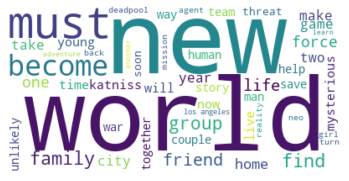

<Figure size 2880x1440 with 0 Axes>

In [61]:
# generate wordcloud
hulu_wordcloud = WordCloud(background_color = 'white', max_words = 50).generate(hulu_text)

# display the generated image:
plt.imshow(hulu_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize = [40,20])
plt.show()

# NOTE TO GRADER: wordcloud will generate images different with different formatting styles when refreshed
# NOTE TO GRADER: wordcloud automatically removes meaningless words, such as the, a, that and so on

In [16]:
# sort the mapping by occruance in the descending order
hulu_occurance_by_freq = dict(sorted(hulu_occurance.items(), key=lambda item: item[1], reverse = True))

In [17]:
# display top 50 word count of hulu
i = 0
for word, freq in hulu_occurance_by_freq.items():
    if i == 50:
        break
    print(word, freq)
    i += 1
    

the 254
a 208
to 155
and 128
of 115
in 62
his 57
is 55
an 49
with 48
her 42
that 37
their 34
as 32
for 31
on 30
they 29
when 29
from 27
has 24
who 23
into 23
are 23
after 22
he 21
by 19
new 18
must 18
but 17
it 16
family 14
group 14
him 14
world 14
them 13
its 13
only 13
have 12
against 12
life 12
be 12
one 11
at 11
out 11
all 10
she 10
home 10
find 10
friends 10
become 9


In [18]:
# get top 50 word count dict of hulu (including meaningful and meaningless words)
hulu_top_50 = dict(sorted(hulu_occurance_by_freq.items(), key = lambda x: x[1], reverse = True)[:50])
hulu_top_50

{'the': 254,
 'a': 208,
 'to': 155,
 'and': 128,
 'of': 115,
 'in': 62,
 'his': 57,
 'is': 55,
 'an': 49,
 'with': 48,
 'her': 42,
 'that': 37,
 'their': 34,
 'as': 32,
 'for': 31,
 'on': 30,
 'they': 29,
 'when': 29,
 'from': 27,
 'has': 24,
 'who': 23,
 'into': 23,
 'are': 23,
 'after': 22,
 'he': 21,
 'by': 19,
 'new': 18,
 'must': 18,
 'but': 17,
 'it': 16,
 'family': 14,
 'group': 14,
 'him': 14,
 'world': 14,
 'them': 13,
 'its': 13,
 'only': 13,
 'have': 12,
 'against': 12,
 'life': 12,
 'be': 12,
 'one': 11,
 'at': 11,
 'out': 11,
 'all': 10,
 'she': 10,
 'home': 10,
 'find': 10,
 'friends': 10,
 'become': 9}

# 2. HBO Max

In [19]:
# read HBO dataset
hbo_df = pd.read_csv("TOP100_HBOMAX.csv")

'''Then take a look at its rows and columns,

Shape is a fancy way of saying it'''
hbo_df.shape

(100, 14)

In [20]:
# overview of HBO dataset
hbo_df['overview']

0     In suburban Chicago during the late 1980s, ten...
1     The assassin Deathstroke tries to save his fam...
2     When LeBron and his young son Dom are trapped ...
3     Washed-up MMA fighter Cole Young, unaware of h...
4     In a time when monsters walk the Earth, humani...
                            ...                        
95    When governments fail to act on behalf of capt...
96    Ford Brody, a Navy bomb expert, has just reuni...
97    Constructed from over 500 hours of never-befor...
98    Explore the mysterious and dangerous home of t...
99    Buck is a big-hearted dog whose blissful domes...
Name: overview, Length: 100, dtype: object

In [21]:
# convert the overview column to list
hbo_list = hbo_df['overview'].to_list()
hbo_list

['In suburban Chicago during the late 1980s, ten-year-old Jake Doyle embarks on a herculean quest to get the latest and greatest video game system for Christmas.',
 'The assassin Deathstroke tries to save his family from the wrath of H.I.V.E. and the murderous Jackal.',
 "When LeBron and his young son Dom are trapped in a digital space by a rogue A.I., LeBron must get them home safe by leading Bugs, Lola Bunny and the whole gang of notoriously undisciplined Looney Tunes to victory over the A.I.'s digitized champions on the court. It's Tunes versus Goons in the highest-stakes challenge of his life.",
 "Washed-up MMA fighter Cole Young, unaware of his heritage, and hunted by Emperor Shang Tsung's best warrior, Sub-Zero, seeks out and trains with Earth's greatest champions as he prepares to stand against the enemies of Outworld in a high stakes battle for the universe.",
 'In a time when monsters walk the Earth, humanity’s fight for its future sets Godzilla and Kong on a collision course 

In [22]:
# split each word into a list
hbo_split_list = []
for overview in hbo_list:
    hbo_split_list.append(overview.split())
hbo_split_list

[['In',
  'suburban',
  'Chicago',
  'during',
  'the',
  'late',
  '1980s,',
  'ten-year-old',
  'Jake',
  'Doyle',
  'embarks',
  'on',
  'a',
  'herculean',
  'quest',
  'to',
  'get',
  'the',
  'latest',
  'and',
  'greatest',
  'video',
  'game',
  'system',
  'for',
  'Christmas.'],
 ['The',
  'assassin',
  'Deathstroke',
  'tries',
  'to',
  'save',
  'his',
  'family',
  'from',
  'the',
  'wrath',
  'of',
  'H.I.V.E.',
  'and',
  'the',
  'murderous',
  'Jackal.'],
 ['When',
  'LeBron',
  'and',
  'his',
  'young',
  'son',
  'Dom',
  'are',
  'trapped',
  'in',
  'a',
  'digital',
  'space',
  'by',
  'a',
  'rogue',
  'A.I.,',
  'LeBron',
  'must',
  'get',
  'them',
  'home',
  'safe',
  'by',
  'leading',
  'Bugs,',
  'Lola',
  'Bunny',
  'and',
  'the',
  'whole',
  'gang',
  'of',
  'notoriously',
  'undisciplined',
  'Looney',
  'Tunes',
  'to',
  'victory',
  'over',
  'the',
  "A.I.'s",
  'digitized',
  'champions',
  'on',
  'the',
  'court.',
  "It's",
  'Tunes',
 

In [23]:
# get the mapping between each word and its occurance
hbo_word_list = []
hbo_occurance = {}
for overview in hbo_split_list:
    for word in overview:
        count_word = ''
        for char in word:
            if char.isalpha():
                count_word += char.lower()
        if count_word:
            hbo_word_list.append(count_word)
            hbo_occurance[count_word] = hbo_occurance.get(count_word, 0) + 1
hbo_occurance

{'in': 83,
 'suburban': 1,
 'chicago': 1,
 'during': 6,
 'the': 327,
 'late': 3,
 's': 5,
 'tenyearold': 1,
 'jake': 1,
 'doyle': 1,
 'embarks': 2,
 'on': 45,
 'a': 181,
 'herculean': 1,
 'quest': 4,
 'to': 159,
 'get': 7,
 'latest': 1,
 'and': 148,
 'greatest': 3,
 'video': 2,
 'game': 3,
 'system': 3,
 'for': 50,
 'christmas': 2,
 'assassin': 2,
 'deathstroke': 1,
 'tries': 3,
 'save': 7,
 'his': 72,
 'family': 6,
 'from': 30,
 'wrath': 1,
 'of': 151,
 'hive': 1,
 'murderous': 1,
 'jackal': 1,
 'when': 25,
 'lebron': 2,
 'young': 23,
 'son': 2,
 'dom': 1,
 'are': 15,
 'trapped': 3,
 'digital': 1,
 'space': 1,
 'by': 25,
 'rogue': 3,
 'ai': 1,
 'must': 12,
 'them': 8,
 'home': 9,
 'safe': 4,
 'leading': 1,
 'bugs': 1,
 'lola': 1,
 'bunny': 1,
 'whole': 2,
 'gang': 4,
 'notoriously': 1,
 'undisciplined': 1,
 'looney': 1,
 'tunes': 2,
 'victory': 1,
 'over': 3,
 'ais': 1,
 'digitized': 1,
 'champions': 2,
 'court': 1,
 'its': 8,
 'versus': 1,
 'goons': 1,
 'higheststakes': 1,
 'challeng

In [24]:
# combine all words together to a string 
hbo_text = ' '.join(word for word in hbo_word_list)

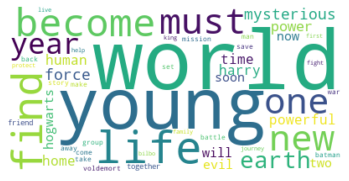

In [62]:
# generate wordcloud
hbo_wordcloud = WordCloud(background_color = 'white', max_words = 50).generate(hbo_text)

# display the generated image:
plt.imshow(hbo_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# NOTE TO GRADER: wordcloud will generate images different with different formatting styles when refreshed
# NOTE TO GRADER: wordcloud automatically removes meaningless words, such as the, a, that and so on

In [26]:
# sort the mapping by occruance in the descending order
hbo_occurance_by_freq = dict(sorted(hbo_occurance.items(), key=lambda item: item[1], reverse = True))

In [27]:
# display top 50 word count of HBO
i = 0
for word, freq in hbo_occurance_by_freq.items():
    if i == 50:
        break
    print(word, freq)
    i += 1

the 327
a 181
to 159
of 151
and 148
in 83
his 72
for 50
on 45
is 45
as 44
an 44
with 37
their 34
from 30
who 27
when 25
by 25
that 25
has 24
but 24
young 23
he 22
they 21
her 19
at 19
life 17
world 17
harry 16
are 15
him 14
must 12
most 12
one 12
she 12
all 12
after 12
mysterious 11
new 11
into 11
it 11
earth 10
only 10
be 10
this 10
home 9
powerful 9
forces 9
become 9
find 9


In [28]:
# get top 50 word count dict of hbo (including meaningful and meaningless words)
hbo_top_50 = dict(sorted(hbo_occurance_by_freq.items(), key = lambda x: x[1], reverse = True)[:50])
hbo_top_50

{'the': 327,
 'a': 181,
 'to': 159,
 'of': 151,
 'and': 148,
 'in': 83,
 'his': 72,
 'for': 50,
 'on': 45,
 'is': 45,
 'as': 44,
 'an': 44,
 'with': 37,
 'their': 34,
 'from': 30,
 'who': 27,
 'when': 25,
 'by': 25,
 'that': 25,
 'has': 24,
 'but': 24,
 'young': 23,
 'he': 22,
 'they': 21,
 'her': 19,
 'at': 19,
 'life': 17,
 'world': 17,
 'harry': 16,
 'are': 15,
 'him': 14,
 'must': 12,
 'most': 12,
 'one': 12,
 'she': 12,
 'all': 12,
 'after': 12,
 'mysterious': 11,
 'new': 11,
 'into': 11,
 'it': 11,
 'earth': 10,
 'only': 10,
 'be': 10,
 'this': 10,
 'home': 9,
 'powerful': 9,
 'forces': 9,
 'become': 9,
 'find': 9}

# 3. Disney Plus

In [32]:
# read Disney Plus dataset
disney_df = pd.read_csv("Disney_MAX_POP_5page.csv")

'''Then take a look at its rows and columns,

Shape is a fancy way of saying it'''
disney_df.shape

(100, 14)

In [34]:
# overview of Disney Plus dataset
disney_df['overview']

0     Shang-Chi must confront the past he thought he...
1     Luca and his best friend Alberto experience an...
2     Dr. Lily Houghton enlists the aid of wisecrack...
3     Natasha Romanoff, also known as Black Widow, c...
4     In 1970s London amidst the punk rock revolutio...
                            ...                        
95    When the kingdom's most wanted-and most charmi...
96    As Stitch, a runaway genetic experiment from a...
97    On behalf of "oppressed bugs everywhere," an i...
98    Armed with the astonishing ability to shrink i...
99    When Papi, Chloe, the pups, Uncle Pedro, and t...
Name: overview, Length: 100, dtype: object

In [35]:
# convert the overview column to list
disney_list = disney_df['overview'].to_list()
disney_list

['Shang-Chi must confront the past he thought he left behind when he is drawn into the web of the mysterious Ten Rings organization.',
 'Luca and his best friend Alberto experience an unforgettable summer on the Italian Riviera. But all the fun is threatened by a deeply-held secret: they are sea monsters from another world just below the water�۪s surface.',
 'Dr. Lily Houghton enlists the aid of wisecracking skipper Frank Wolff to take her down the Amazon in his dilapidated boat. Together, they search for an ancient tree that holds the power to heal ��� a discovery that will change the future of medicine.',
 'Natasha Romanoff, also known as Black Widow, confronts the darker parts of her ledger when a dangerous conspiracy with ties to her past arises. Pursued by a force that will stop at nothing to bring her down, Natasha must deal with her history as a spy and the broken relationships left in her wake long before she became an Avenger.',
 'In 1970s London amidst the punk rock revolutio

In [36]:
# split each word into a list
disney_split_list = []
for overview in disney_list:
    disney_split_list.append(overview.split())
disney_split_list

[['Shang-Chi',
  'must',
  'confront',
  'the',
  'past',
  'he',
  'thought',
  'he',
  'left',
  'behind',
  'when',
  'he',
  'is',
  'drawn',
  'into',
  'the',
  'web',
  'of',
  'the',
  'mysterious',
  'Ten',
  'Rings',
  'organization.'],
 ['Luca',
  'and',
  'his',
  'best',
  'friend',
  'Alberto',
  'experience',
  'an',
  'unforgettable',
  'summer',
  'on',
  'the',
  'Italian',
  'Riviera.',
  'But',
  'all',
  'the',
  'fun',
  'is',
  'threatened',
  'by',
  'a',
  'deeply-held',
  'secret:',
  'they',
  'are',
  'sea',
  'monsters',
  'from',
  'another',
  'world',
  'just',
  'below',
  'the',
  'water�۪s',
  'surface.'],
 ['Dr.',
  'Lily',
  'Houghton',
  'enlists',
  'the',
  'aid',
  'of',
  'wisecracking',
  'skipper',
  'Frank',
  'Wolff',
  'to',
  'take',
  'her',
  'down',
  'the',
  'Amazon',
  'in',
  'his',
  'dilapidated',
  'boat.',
  'Together,',
  'they',
  'search',
  'for',
  'an',
  'ancient',
  'tree',
  'that',
  'holds',
  'the',
  'power',
  'to

In [37]:
# get the mapping between each word and its occurance
disney_word_list = []
disney_occurance = {}
for overview in disney_split_list:
    for word in overview:
        count_word = ''
        for char in word:
            if char.isalpha():
                count_word += char.lower()
        if count_word:
            disney_word_list.append(count_word)
            disney_occurance[count_word] = disney_occurance.get(count_word, 0) + 1
disney_occurance

{'shangchi': 1,
 'must': 24,
 'confront': 2,
 'the': 300,
 'past': 5,
 'he': 34,
 'thought': 1,
 'left': 4,
 'behind': 3,
 'when': 30,
 'is': 59,
 'drawn': 1,
 'into': 19,
 'web': 2,
 'of': 147,
 'mysterious': 7,
 'ten': 1,
 'rings': 1,
 'organization': 2,
 'luca': 2,
 'and': 158,
 'his': 88,
 'best': 4,
 'friend': 4,
 'alberto': 3,
 'experience': 2,
 'an': 62,
 'unforgettable': 1,
 'summer': 3,
 'on': 37,
 'italian': 1,
 'riviera': 1,
 'but': 30,
 'all': 11,
 'fun': 1,
 'threatened': 2,
 'by': 26,
 'a': 156,
 'deeplyheld': 1,
 'secret': 4,
 'they': 16,
 'are': 13,
 'sea': 2,
 'monsters': 2,
 'from': 35,
 'another': 1,
 'world': 25,
 'just': 5,
 'below': 1,
 'waters': 1,
 'surface': 1,
 'dr': 1,
 'lily': 1,
 'houghton': 1,
 'enlists': 1,
 'aid': 2,
 'wisecracking': 3,
 'skipper': 1,
 'frank': 1,
 'wolff': 1,
 'to': 180,
 'take': 3,
 'her': 47,
 'down': 5,
 'amazon': 1,
 'in': 84,
 'dilapidated': 1,
 'boat': 1,
 'together': 7,
 'search': 2,
 'for': 30,
 'ancient': 5,
 'tree': 1,
 'that'

In [38]:
# combine all words together to a string 
disney_text = ' '.join(word for word in disney_word_list)

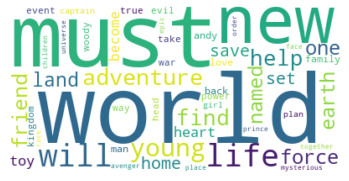

In [63]:
# generate wordcloud
disney_wordcloud = WordCloud(background_color = 'white', max_words = 50).generate(disney_text)

# display the generated image:
plt.imshow(disney_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# NOTE TO GRADER: wordcloud will generate images different with different formatting styles when refreshed
# NOTE TO GRADER: wordcloud automatically removes meaningless words, such as the, a, that and so on

In [41]:
# sort the mapping by occruance in the descending order
disney_occurance_by_freq = dict(sorted(disney_occurance.items(), key=lambda item: item[1], reverse = True))

In [42]:
# display top 50 word count of Disney Plus
i = 0
for word, freq in disney_occurance_by_freq.items():
    if i == 50:
        break
    print(word, freq)
    i += 1

the 300
to 180
and 158
a 156
of 147
his 88
in 84
an 62
is 59
with 50
her 47
that 39
as 39
on 37
from 35
he 34
when 30
but 30
for 30
by 26
world 25
must 24
has 22
their 20
into 19
she 19
new 19
will 18
life 18
who 17
they 16
young 16
him 16
at 15
up 14
are 13
be 13
adventure 13
all 11
help 11
named 10
one 10
after 10
save 10
its 10
home 10
out 10
earth 9
back 9
about 9


In [44]:
# get top 50 word count dict of Disney Plus (including meaningful and meaningless words)
disney_top_50 = dict(sorted(disney_occurance_by_freq.items(), key = lambda x: x[1], reverse = True)[:50])
disney_top_50

{'the': 300,
 'to': 180,
 'and': 158,
 'a': 156,
 'of': 147,
 'his': 88,
 'in': 84,
 'an': 62,
 'is': 59,
 'with': 50,
 'her': 47,
 'that': 39,
 'as': 39,
 'on': 37,
 'from': 35,
 'he': 34,
 'when': 30,
 'but': 30,
 'for': 30,
 'by': 26,
 'world': 25,
 'must': 24,
 'has': 22,
 'their': 20,
 'into': 19,
 'she': 19,
 'new': 19,
 'will': 18,
 'life': 18,
 'who': 17,
 'they': 16,
 'young': 16,
 'him': 16,
 'at': 15,
 'up': 14,
 'are': 13,
 'be': 13,
 'adventure': 13,
 'all': 11,
 'help': 11,
 'named': 10,
 'one': 10,
 'after': 10,
 'save': 10,
 'its': 10,
 'home': 10,
 'out': 10,
 'earth': 9,
 'back': 9,
 'about': 9}

# 4. Showtime

In [45]:
# read Showtime dataset
showtime_df = pd.read_csv("6105project_ShowtimeData.csv")

'''Then take a look at its rows and columns,

Shape is a fancy way of saying it'''
disney_df.shape

(100, 14)

In [46]:
# overview of Showtime dataset
showtime_df['overview']

0     A seemingly cold-blooded hitman is assigned to...
1     Lifelong platonic friends Zack and Miri look t...
2     Ten years after the first American Pie movie, ...
3     Jen and a group of friends set out to hike the...
4     With the help of a German bounty hunter, a fre...
                            ...                        
95    A mild-mannered college professor discovers a ...
96    A lonely young boy feels different from everyo...
97    When his best friend and podcast co-host goes ...
98    The Flintstones are at it again. The Flintston...
99    The true story of Billy Moore, an English boxe...
Name: overview, Length: 100, dtype: object

In [47]:
# convert the overview column to list
showtime_list = showtime_df['overview'].to_list()
showtime_list

['A seemingly cold-blooded hitman is assigned to befriend a call girl, but all hell breaks loose when he is assigned to kill her.',
 'Lifelong platonic friends Zack and Miri look to solve their respective cash-flow problems by making an adult film together. As the cameras roll, however, the duo begin to sense that they may have more feelings for each other than they previously thought.',
 'Ten years after the first American Pie movie, three new hapless virgins discover the Bible hidden in the school library at East Great Falls High. Unfortunately for them, the book is ruined, and with incomplete advice, the Bible leads them on a hilarious journey to lose their virginity.',
 'Jen and a group of friends set out to hike the Appalachian Trail. Despite warnings to stick to the trail, the hikers stray off course—and cross into land inhabited by The Foundation, a hidden community of mountain dwellers who use deadly means to protect their way of life.',
 'With the help of a German bounty hunte

In [48]:
# split each word into a list
showtime_split_list = []
for overview in showtime_list:
    showtime_split_list.append(overview.split())
showtime_split_list

[['A',
  'seemingly',
  'cold-blooded',
  'hitman',
  'is',
  'assigned',
  'to',
  'befriend',
  'a',
  'call',
  'girl,',
  'but',
  'all',
  'hell',
  'breaks',
  'loose',
  'when',
  'he',
  'is',
  'assigned',
  'to',
  'kill',
  'her.'],
 ['Lifelong',
  'platonic',
  'friends',
  'Zack',
  'and',
  'Miri',
  'look',
  'to',
  'solve',
  'their',
  'respective',
  'cash-flow',
  'problems',
  'by',
  'making',
  'an',
  'adult',
  'film',
  'together.',
  'As',
  'the',
  'cameras',
  'roll,',
  'however,',
  'the',
  'duo',
  'begin',
  'to',
  'sense',
  'that',
  'they',
  'may',
  'have',
  'more',
  'feelings',
  'for',
  'each',
  'other',
  'than',
  'they',
  'previously',
  'thought.'],
 ['Ten',
  'years',
  'after',
  'the',
  'first',
  'American',
  'Pie',
  'movie,',
  'three',
  'new',
  'hapless',
  'virgins',
  'discover',
  'the',
  'Bible',
  'hidden',
  'in',
  'the',
  'school',
  'library',
  'at',
  'East',
  'Great',
  'Falls',
  'High.',
  'Unfortunately',


In [49]:
# get the mapping between each word and its occurance
showtime_word_list = []
showtime_occurance = {}
for overview in showtime_split_list:
    for word in overview:
        count_word = ''
        for char in word:
            if char.isalpha():
                count_word += char.lower()
        if count_word:
            showtime_word_list.append(count_word)
            showtime_occurance[count_word] = showtime_occurance.get(count_word, 0) + 1
showtime_occurance

{'a': 204,
 'seemingly': 2,
 'coldblooded': 1,
 'hitman': 1,
 'is': 42,
 'assigned': 3,
 'to': 140,
 'befriend': 2,
 'call': 3,
 'girl': 2,
 'but': 16,
 'all': 9,
 'hell': 3,
 'breaks': 2,
 'loose': 1,
 'when': 36,
 'he': 29,
 'kill': 2,
 'her': 37,
 'lifelong': 1,
 'platonic': 1,
 'friends': 9,
 'zack': 1,
 'and': 125,
 'miri': 1,
 'look': 1,
 'solve': 1,
 'their': 30,
 'respective': 1,
 'cashflow': 1,
 'problems': 2,
 'by': 21,
 'making': 1,
 'an': 39,
 'adult': 4,
 'film': 3,
 'together': 3,
 'as': 23,
 'the': 214,
 'cameras': 2,
 'roll': 1,
 'however': 1,
 'duo': 1,
 'begin': 2,
 'sense': 1,
 'that': 29,
 'they': 18,
 'may': 3,
 'have': 8,
 'more': 5,
 'feelings': 1,
 'for': 31,
 'each': 1,
 'other': 3,
 'than': 4,
 'previously': 1,
 'thought': 2,
 'ten': 1,
 'years': 10,
 'after': 19,
 'first': 4,
 'american': 3,
 'pie': 1,
 'movie': 3,
 'three': 8,
 'new': 16,
 'hapless': 1,
 'virgins': 1,
 'discover': 6,
 'bible': 2,
 'hidden': 2,
 'in': 77,
 'school': 9,
 'library': 1,
 'at': 1

In [50]:
# combine all words together to a string 
showtime_text = ' '.join(word for word in showtime_word_list)

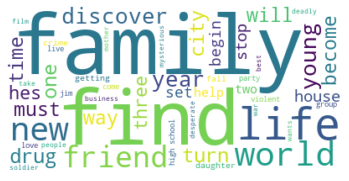

In [64]:
# generate wordcloud
showtime_wordcloud = WordCloud(background_color = 'white', max_words = 50).generate(showtime_text)

# Display the generated image:
plt.imshow(showtime_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# NOTE TO GRADER: wordcloud will generate images different with different formatting styles when refreshed
# NOTE TO GRADER: wordcloud automatically removes meaningless words, such as the, a, that and so on

In [52]:
# sort the mapping by occruance in the descending order
showtime_occurance_by_freq = dict(sorted(showtime_occurance.items(), key=lambda item: item[1], reverse = True))

In [53]:
# display top 50 word count of showtime
i = 0
for word, freq in showtime_occurance_by_freq.items():
    if i == 50:
        break
    print(word, freq)
    i += 1

the 214
a 204
to 140
and 125
of 109
in 77
his 70
is 42
with 40
an 39
her 37
when 36
on 32
for 31
from 31
their 30
he 29
that 29
who 29
into 24
as 23
by 21
has 21
after 19
they 18
at 17
out 17
are 17
but 16
new 16
family 16
him 15
life 14
young 12
she 12
world 11
it 11
years 10
one 10
about 10
all 9
friends 9
school 9
will 9
must 9
city 9
have 8
three 8
high 8
them 8


In [54]:
# get top 50 word count dict of showtime (including meaningful and meaningless words)
showtime_top_50 = dict(sorted(showtime_occurance_by_freq.items(), key = lambda x: x[1], reverse = True)[:50])
showtime_top_50

{'the': 214,
 'a': 204,
 'to': 140,
 'and': 125,
 'of': 109,
 'in': 77,
 'his': 70,
 'is': 42,
 'with': 40,
 'an': 39,
 'her': 37,
 'when': 36,
 'on': 32,
 'for': 31,
 'from': 31,
 'their': 30,
 'he': 29,
 'that': 29,
 'who': 29,
 'into': 24,
 'as': 23,
 'by': 21,
 'has': 21,
 'after': 19,
 'they': 18,
 'at': 17,
 'out': 17,
 'are': 17,
 'but': 16,
 'new': 16,
 'family': 16,
 'him': 15,
 'life': 14,
 'young': 12,
 'she': 12,
 'world': 11,
 'it': 11,
 'years': 10,
 'one': 10,
 'about': 10,
 'all': 9,
 'friends': 9,
 'school': 9,
 'will': 9,
 'must': 9,
 'city': 9,
 'have': 8,
 'three': 8,
 'high': 8,
 'them': 8}

# Count what words include in 4 top 50 word count dicts

In [69]:
common_top_50 = {}

for hulu_word in hulu_top_50:
    common_top_50[hulu_word] = common_top_50.get(hulu_word, 0) + 1
    
for hbo_word in hbo_top_50:
    common_top_50[hbo_word] = common_top_50.get(hbo_word, 0) + 1
    
for disney_word in disney_top_50:
    common_top_50[disney_word] = common_top_50.get(disney_word, 0) + 1
    
for showtime_word in showtime_top_50:
    common_top_50[showtime_word] = common_top_50.get(showtime_word, 0) + 1
    
common_top_50 = dict(sorted(common_top_50.items(), key=lambda item: item[1], reverse = True))
common_top_50
# common_top_50 is the mapping between top 50 words in each dataset and number of occurance
# if value = 4, the word is top 50 in each dataset

{'the': 4,
 'a': 4,
 'to': 4,
 'and': 4,
 'of': 4,
 'in': 4,
 'his': 4,
 'is': 4,
 'an': 4,
 'with': 4,
 'her': 4,
 'that': 4,
 'their': 4,
 'as': 4,
 'for': 4,
 'on': 4,
 'they': 4,
 'when': 4,
 'from': 4,
 'has': 4,
 'who': 4,
 'into': 4,
 'are': 4,
 'after': 4,
 'he': 4,
 'by': 4,
 'new': 4,
 'must': 4,
 'but': 4,
 'him': 4,
 'world': 4,
 'life': 4,
 'one': 4,
 'at': 4,
 'all': 4,
 'she': 4,
 'it': 3,
 'be': 3,
 'out': 3,
 'home': 3,
 'young': 3,
 'family': 2,
 'them': 2,
 'its': 2,
 'only': 2,
 'have': 2,
 'find': 2,
 'friends': 2,
 'become': 2,
 'earth': 2,
 'will': 2,
 'about': 2,
 'group': 1,
 'against': 1,
 'harry': 1,
 'most': 1,
 'mysterious': 1,
 'this': 1,
 'powerful': 1,
 'forces': 1,
 'up': 1,
 'adventure': 1,
 'help': 1,
 'named': 1,
 'save': 1,
 'back': 1,
 'years': 1,
 'school': 1,
 'city': 1,
 'three': 1,
 'high': 1}

In [71]:
# Three meaningful words ('new' , 'world', 'life') appear in top 50 words of popular movies of all four platforms
# 6% is the rate of common meaningful words of top 50 most frequent words 
3 / 50

0.06